# Weather Forecast Using  PyOWM
The goal of this notebook is to perform a weather forecast with the library pyown executed by Papermill.<br>
PyOWM is a wrapper for OpenWeatherMap web APIs providing a easier interface to fetch weather data.<br><br>
More information on the links below:<br>
* https://pypi.org/project/pyowm/
* https://pyowm.readthedocs.io/en/latest/usage-examples-v2/weather-api-usage-examples.html



## 1. Accessing pyown API
On the first steps of our analysis we are going to get weather information for the define city using pyown API. <br>
The information is going to be organized on a dictionary, and later loaded as a pandas DataFrame for performing the Data wrangling.

In [1]:
# import libraries
import pyowm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pdfkit 

### 1.1 Setting PyOWM API key and defining variable
This first part of the workflow we define the API key to access OpenWeather service and also the cell to contain the parameter `city` that can be defined using Papermill.

In [2]:
# Set API key
owm = pyowm.OWM('3fb62110b42fec1124c89b9931aed05b')

In [3]:
# Define the default parameters
city = 'London,UK'

In [4]:
# Parameters
city = "Sao Paulo,BR"


### 1.2 Fetching weather information for the defined city
On this part we are going to use PyOWM to fetch data about the city and organized it first on a dictionary, them on a Pandas DataFrame.

In [5]:
# Instantiate forecast object and fetch weather information about city
fc = owm.three_hours_forecast(city)
forecast = fc.get_forecast()

In [6]:
# Create a dictionary to organize the forecast data for the city of interest
dict_forecast = {
    'datetime':[],
    'clouds':[],
    'humidity':[],
    'temp':[],
    'temp_max':[],
    'temp_min':[],
    'detailed_status':[],
    'icon_url':[],
    'rain_vol':[]
}

In [7]:
#Itereate over forecast object acessing the weather features
for weather in forecast:
    dict_forecast['datetime'].append(str(weather.get_reference_time(timeformat='iso')))
    dict_forecast['clouds'].append(weather.get_clouds())
    dict_forecast['humidity'].append(weather.get_humidity())
    dict_forecast['temp'].append(weather.get_temperature(unit='celsius').get('temp'))
    dict_forecast['temp_max'].append(weather.get_temperature(unit='celsius').get('temp_max'))
    dict_forecast['temp_min'].append(weather.get_temperature(unit='celsius').get('temp_min'))
    
    dict_forecast['detailed_status'].append(weather.get_detailed_status())
    dict_forecast['icon_url'].append(weather.get_weather_icon_url())
    if '3h' in weather.get_rain().keys():
        dict_forecast['rain_vol'].append(weather.get_rain().get('3h'))
    else:
        dict_forecast['rain_vol'].append(0)

In [8]:
# Create Dataframe from dictionary
df = pd.DataFrame.from_dict(dict_forecast)

In [9]:
# Set dtype to datetime for 'datetime' column 
df['datetime'] = pd.to_datetime(df['datetime'])

In [10]:
df

,datetime,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
0,2019-12-10 03:00:00+00:00,100,83,19.49,19.88,19.49,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00
1,2019-12-10 06:00:00+00:00,100,83,19.13,19.42,19.13,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00
2,2019-12-10 09:00:00+00:00,99,85,19.15,19.35,19.15,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
3,2019-12-10 12:00:00+00:00,94,69,23.30,23.40,23.30,overcast clouds,http://openweathermap.org/img/w/04d.png,0.00
4,2019-12-10 15:00:00+00:00,100,52,28.00,28.00,28.00,light rain,http://openweathermap.org/img/w/10d.png,0.75
5,2019-12-10 18:00:00+00:00,100,64,24.93,24.93,24.93,light rain,http://openweathermap.org/img/w/10d.png,1.69
6,2019-12-10 21:00:00+00:00,100,70,23.15,23.15,23.15,light rain,http://openweathermap.org/img/w/10d.png,0.81
7,2019-12-11 00:00:00+00:00,100,75,21.42,21.42,21.42,light rain,http://openweathermap.org/img/w/10n.png,0.25
8,2019-12-11 03:00:00+00:00,100,78,20.56,20.56,20.56,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00
9,2019-12-11 06:00:00+00:00,100,82,20.05,20.05,20.05,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00


### 1.3 Understanding the DataFrame generated from the returned data.
The function `owm.three_hours_forecast(city)` returns us information in 3 hour steps, for the next 5 days, with a total of 40 data points.
We decided to work with the following variables:
* clouds
* humidity
* temp
* temp_max
* temp_min
* detailed_status
* rain_vol

### 1.4 Aggregating data based on the days
On this step we are going to aggregate the data by day to facilitate the understanding and the plotting.

In [11]:
# Create a dataframe agregating the values based on each day
# for mean
df_mean = df.resample('D', on='datetime').mean()
df_mean.index = df_mean.index.date
#df_mean.drop('datetime', axis=1, inplace=True)
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-10,99.00,72.285714,22.45000,22.59000,22.45000,0.464286
2019-12-11,100.00,70.625000,23.13625,23.13625,23.13625,1.156250
2019-12-12,100.00,68.250000,23.99250,23.99250,23.99250,2.648750
2019-12-13,99.50,66.750000,25.02250,25.02250,25.02250,1.093750
2019-12-14,99.75,73.750000,23.10250,23.10250,23.10250,0.155000
2019-12-15,100.00,82.000000,21.10000,21.10000,21.10000,0.000000


In [12]:
# for max
df_max = df.resample('D', on='datetime').max()
df_max.index = df_max.index.date
df_max.drop('datetime', axis=1, inplace=True)

df_max

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-10,100,85,28.00,28.00,28.00,overcast clouds,http://openweathermap.org/img/w/10d.png,1.69
2019-12-11,100,82,27.45,27.45,27.45,overcast clouds,http://openweathermap.org/img/w/10n.png,3.25
2019-12-12,100,82,28.44,28.44,28.44,overcast clouds,http://openweathermap.org/img/w/10n.png,7.63
2019-12-13,100,82,29.58,29.58,29.58,overcast clouds,http://openweathermap.org/img/w/10n.png,4.44
2019-12-14,100,85,26.67,26.67,26.67,overcast clouds,http://openweathermap.org/img/w/10n.png,0.31
2019-12-15,100,82,21.10,21.10,21.10,overcast clouds,http://openweathermap.org/img/w/04n.png,0.00


In [13]:
# for min
df_min = df.resample('D', on='datetime').min()
df_min.index = df_min.index.date
df_min.drop('datetime', axis=1, inplace=True)
df_min

,clouds,humidity,temp,temp_max,temp_min,detailed_status,icon_url,rain_vol
2019-12-10,94,52,19.13,19.35,19.13,light rain,http://openweathermap.org/img/w/04d.png,0.0
2019-12-11,100,55,20.05,20.05,20.05,light rain,http://openweathermap.org/img/w/04d.png,0.0
2019-12-12,100,51,21.18,21.18,21.18,light rain,http://openweathermap.org/img/w/04d.png,0.0
2019-12-13,96,47,21.71,21.71,21.71,light rain,http://openweathermap.org/img/w/04d.png,0.0
2019-12-14,98,57,20.82,20.82,20.82,light rain,http://openweathermap.org/img/w/04d.png,0.0
2019-12-15,100,82,21.10,21.10,21.10,overcast clouds,http://openweathermap.org/img/w/04n.png,0.0


In [14]:
# Create a Dataframe with temperature values (min, max, average) by merging on index
df_temp = df_min[['temp']].merge(df_max[['temp']], 
                                 left_index=True, 
                                 right_index=True, 
                                 suffixes=('_min', '_max')).merge(df_mean[['temp']],
                                                                  left_index=True, 
                                                                  right_index=True)
# Rename columns
df_temp.columns = ['temp_min', 'temp_max', 'temp_mean']
df_temp

,temp_min,temp_max,temp_mean
2019-12-10,19.13,28.00,22.45000
2019-12-11,20.05,27.45,23.13625
2019-12-12,21.18,28.44,23.99250
2019-12-13,21.71,29.58,25.02250
2019-12-14,20.82,26.67,23.10250
2019-12-15,21.10,21.10,21.10000


## 2 Creating the visualizations
On this part, we are going to plot the organized data using seaborn.

### 2.1 Temperature plot
Show the forecast for maximun, minimun and average temperature for the next 5 days on the same plots.

/home/gabriel/miniconda3/envs/papermill/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


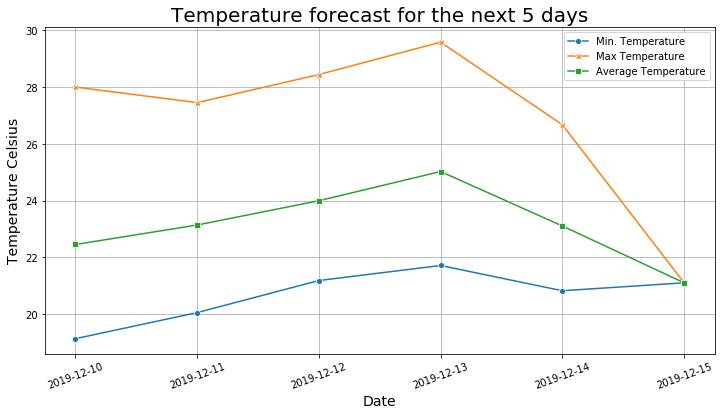

In [15]:
# Plotting the temperature for the next 5 days
fig = plt.figure()
sns_plot = sns.lineplot(data=df_temp, style="event",markers=True, dashes=False)
sns_plot.set_title(f'Temperature forecast for the next 5 days', fontsize=20)
sns_plot.set_xlabel('Date', fontsize=14)
sns_plot.set_ylabel('Temperature Celsius', fontsize=14)
sns_plot.set_xticklabels(df_temp.index, rotation=20)
sns_plot.grid(True)

sns_plot.legend(labels=['Min. Temperature', 'Max Temperature', 'Average Temperature'])
fig.set_size_inches(12, 6)

temperature_plot = f"{city.split(',')[0].replace(' ','_')}_temperature.png"
sns_plot.figure.savefig(temperature_plot, 
                  dpi=300, facecolor='w', 
                  orientation='portrait',
                  bbox_inches='tight')


### 2.2 Humidity, rain and clouds plot
On this plot we are going to aggregate the data about pluviometry and humidity.

In [16]:
# Create a Dataframe with total expected volume for rain on each day
df_rain_per_day = df.resample('D', on='datetime').sum()[['rain_vol']]
df_rain_per_day.index = df_rain_per_day.index.date
df_rain_per_day

,rain_vol
2019-12-10,3.25
2019-12-11,9.25
2019-12-12,21.19
2019-12-13,8.75
2019-12-14,1.24
2019-12-15,0.00


In [17]:
df_mean

,clouds,humidity,temp,temp_max,temp_min,rain_vol
2019-12-10,99.00,72.285714,22.45000,22.59000,22.45000,0.464286
2019-12-11,100.00,70.625000,23.13625,23.13625,23.13625,1.156250
2019-12-12,100.00,68.250000,23.99250,23.99250,23.99250,2.648750
2019-12-13,99.50,66.750000,25.02250,25.02250,25.02250,1.093750
2019-12-14,99.75,73.750000,23.10250,23.10250,23.10250,0.155000
2019-12-15,100.00,82.000000,21.10000,21.10000,21.10000,0.000000


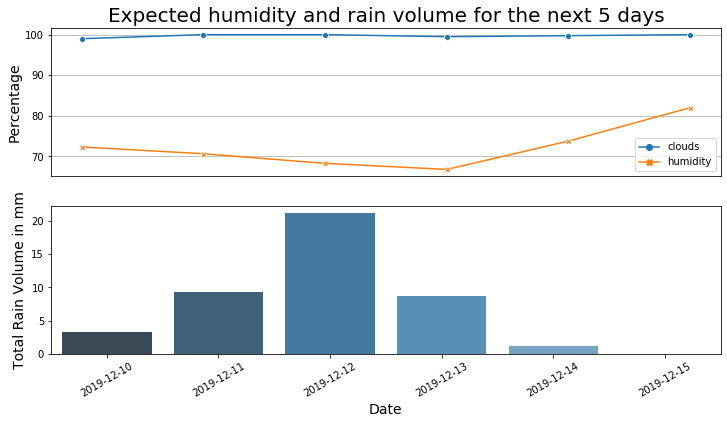

In [18]:
fig = plt.figure()
# Lineplot for humidity and clouds
ax1 = fig.add_subplot(211)
ax1 = sns.lineplot(data=df_mean[['clouds', 'humidity']], markers=True, dashes=False)
ax1.set_xticks([])
ax1.set_title(f'Expected humidity and rain volume for the next 5 days', fontsize=20)
ax1.set_ylabel('Percentage', fontsize=14)
ax1.grid(True)

# Barplot for total rain per day
ax2 = fig.add_subplot(212)
ax2 = sns.barplot(x=df_rain_per_day.index, y='rain_vol', 
                  data=df_rain_per_day,
                  palette="Blues_d")
ax2.set_xticklabels(df_temp.index, rotation=30)
ax2.set_ylabel('Total Rain Volume in mm', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
fig.set_size_inches(12, 6)

rain_humidity_plot = f"{city.split(',')[0].replace(' ','_')}_rain_humidity.png"
fig.savefig(rain_humidity_plot, 
              dpi=300, facecolor='w', 
              orientation='portrait',
              bbox_inches='tight')


### 3 Creating the weather report

On this part of the workflow we are going to use a simple HTML template to create our final report, adding information about the city chosen and the plots generated above.

In [19]:
# Missing variables for the report

In [20]:
# Defining start and end date for the analysis
today = str(df_mean.index.min()).replace('-', '/')
last_day = str(df_mean.index.max()).replace('-', '/')

In [21]:
# HTML template to add our data and plots
report_template = f'''
<!DOCTYPE html>
    <html>
      <head>
        <meta charset='utf-8'>
        <title>Weather Forecast with PyOWM</title>
        <link rel='stylesheet' href='report.css'>
          <style>
          h1 {{
          font-family: Arial;
          font-size: 300%;
          }}
          h2 {{
          font-family: Arial;
          font-size: 200%;
          }}
          @page {{
          size: 7in 9.25in;
          margin: 27mm 16mm 27mm 16mm;
          }}
          </style>                       
      </head>
      <h1 align="center">Weather forecast for {city}</h1>
      <h2 align="center">Initial date: {today}</h2>
      <h2 align="center">Final date: {last_day}</h2>
        
      <figure>
        <img src="{temperature_plot}" width="1200" height="600">
      </figure>
      <figure>
        <img src="{rain_humidity_plot}" width="1200" height="600">
      </figure>      
    </html>
'''

In [22]:
# Save HTML string to file
html_report = f"{city.split(',')[0].replace(' ','_')}_report.html"
with open(html_report, "w") as r:
    r.write(report_template)

In [23]:
# Use pdfkit to create the pdf report from the 
pdfkit.from_file(html_report, f"{city.split(',')[0].replace(' ', '_')}_weather_report_for.pdf") 

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Loading page (1/2)
Printing pages (2/2)                                               
Done                                                           


True